# Creating&nbsp;a&nbsp;Clinical&nbsp;Trials Dataset

Hello, my name is Dhananjay Khazanchi. At the time of creating this notebook, I am a Master's of Data Science student at Illinois Institute of Technology. During my undergrad, I studied business, computer information systems, and computer science. My specialty is data science with a business intelligence focus. 

Currently, the process of finding a doctor to run a clinical trial is very arduous. While individual pieces of information can be found, there is no publicly available database with all the necessary information combined. The goal of this notebook is to create a comprehensive dataset of U.S. doctors that have previously conducted clinical trials. This was accomplished through combining three different datasets. A lot of data cleaning and merging of databases had to be done to create as complete of a dataset as possible. In the end, I was able to create a dataset containing over 30,000 records of unique clinical trials that can be used to identify doctors for future clinical trials. 

In [1]:
!ls /datasets/sources

DAC_NationalDownloadableFile.csv  facilities.txt  facility_investigators.txt


There&nbsp;are&nbsp;three&nbsp;datasets&nbsp;I&nbsp;am&nbsp;combining&nbsp;to&nbsp;create&nbsp;my&nbsp;dataset. I will go into further detail about each dataset in their individual categories.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfFields= ['NPI', ' lst_nm', ' frst_nm', ' mid_nm', ' suff', ' gndr', ' Med_sch', ' Grd_yr', ' pri_spec', ' sec_spec_all', ' org_nm', ' num_org_mem', ' adr_ln_1', ' adr_ln_2', ' cty', ' st', ' zip', ' phn_numbr', ' hosp_afl_lbn_1', ' hosp_afl_lbn_2', ' hosp_afl_lbn_3', ' hosp_afl_lbn_4', ' hosp_afl_lbn_5', ' ind_assgn', ' grp_assgn', ' adrs_id']

In [4]:
df = pd.read_csv('DAC_NationalDownloadableFile.csv', usecols=dfFields)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (18,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dfFFields = ['id', 'nct_id', 'name', 'city', 'state', 'zip', 'country']

In [6]:
dfF = pd.read_csv('facilities.csv', usecols=dfFFields)

In [7]:
dfFIFields = ['id', 'nct_id', 'facility_id', 'role', 'name']

In [8]:
dfFI = pd.read_csv('facility_investigators.csv', usecols=dfFIFields)

### Facility Investigators Dataset

The&nbsp;Facility&nbsp;Investigators&nbsp;(FI) dataset&nbsp;from&nbsp;the&nbsp;National&nbsp;Institute&nbsp;of&nbsp;Health contains over 200,000 rows about clinical trials, including the person leading the trial and the facility where the trial took place.

In [9]:
dfFI

,id,nct_id,facility_id,role,name
0,1653475,NCT04631068,8707217,Principal Investigator,"Cedric Schweitzer, MD"
1,1653476,NCT04631068,8707217,Sub-Investigator,"David Toubol, MD"
2,1653477,NCT04631068,8707218,Principal Investigator,"Tiago Monteiro, MD"
3,1653478,NCT04631068,8707219,Principal Investigator,"Paul Rosen, FRCOphth"
4,1653479,NCT04631146,8707230,Principal Investigator,"Yilong Wu, MD"
...,...,...,...,...,...
221911,1294491,NCT03726320,7718790,Principal Investigator,"Danil Makarov, MD"
221912,1294492,NCT03709134,7718908,Principal Investigator,"Kasia J Jerzak, MD, MSc"
221913,1294493,NCT03706482,7718909,Principal Investigator,"Eva Åström, MD PhD"
221914,1294494,NCT03706482,7718909,Sub-Investigator,"Mikael Sundin, MD PhD"


In [10]:
dfFI.isnull().sum() #checking if there are any missing values within the datset

id             0
nct_id         0
facility_id    0
role           0
name           0
dtype: int64

In [11]:
dfFI['id'].duplicated().any() #checking if "id" column has any duplicates

False

After quickly looking at the FI dataset, there is no missing data, but I see that "name" column has quite a lot of issues. Some issues include the certifications being combined with the name, unnecessary punctuation, and irregular capitalization of the names (not pictured above).

In [12]:
#removes the certification alongside each name
dfFI["name"] = dfFI["name"].str.split(",").apply(lambda x: x[0])

In [13]:
#all the chracters I do not want to be present within the name column
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~•'
transtab = str.maketrans(dict.fromkeys(punct, ''))
#removing the previously specified characters from the names
dfFI["name"] = '|'.join(dfFI["name"].tolist()).translate(transtab).split('|')
#removing any leading or trailing whitespaces
dfFI["name"] = dfFI["name"].str.strip()
#converting names to be fully uppercase
dfFI["name"] = dfFI["name"].str.upper()

After cleaning the name column, it is properly sorted and ready to be merged with the next dataset!

In [14]:
dfFI.head()

,id,nct_id,facility_id,role,name
0,1653475,NCT04631068,8707217,Principal Investigator,CEDRIC SCHWEITZER
1,1653476,NCT04631068,8707217,Sub-Investigator,DAVID TOUBOL
2,1653477,NCT04631068,8707218,Principal Investigator,TIAGO MONTEIRO
3,1653478,NCT04631068,8707219,Principal Investigator,PAUL ROSEN
4,1653479,NCT04631146,8707230,Principal Investigator,YILONG WU


In [15]:
dfFI['name'].value_counts()

BRYAN A FALLER                2922
RICHARD L DEMING              2377
JOHN A ELLERTON               2100
ALISON K CONLIN               1346
JOHN M SCHALLENKAMP           1275
                              ... 
JING-MEI HSU                     1
ESTHER PARDO                     1
SABINE VIEILLOT                  1
SAMUEL LENTZ                     1
MARÍA P BARNESTEIN-FONSECA       1
Name: name, Length: 119431, dtype: int64

### Facilities Dataset

The Facilities (F) dataset is also from the National Institute of Health and contains over 2.6 million rows about where a clinical trial was conducted and the facility where it was conducted. 

In [16]:
dfF

,id,nct_id,name,city,state,zip,country
0,8790702,NCT03724162,Oslo University Hospital,Oslo,NaN,0424,Norway
1,8790703,NCT03724162,"Department of vascular surgery, Oslo Universit...",Oslo,NaN,NaN,Norway
2,8790704,NCT03723954,Golf National,Saint-Quentin-en-Yvelines,NaN,78280,France
3,8790705,NCT03723668,Kidney Transplantation Care at Veteran's Affai...,Philadelphia,Pennsylvania,19104,United States
4,8790706,NCT03723668,Paris Transplant Group,Paris,NaN,75015,France
...,...,...,...,...,...,...,...
2619509,8790679,NCT00457951,Akademicki Szpital Kliniczny im. Jana Mikulicz...,Wroclaw,NaN,50-417,Poland
2619510,8790683,NCT00345943,New York State Psychiatric Institute at Columb...,New York,New York,10032,United States
2619511,8790684,NCT00258427,"Masonic Cancer Center, University of Minnesota",Minneapolis,Minnesota,55455,United States
2619512,8790685,NCT00250341,UCLA,Los Angeles,California,90095,United States


In [17]:
dfF.isnull().sum() #checking for missing values

id               0
nct_id           0
name        220140
city           106
state      1053268
zip         532821
country        106
dtype: int64

In [18]:
dfF['name']=dfF['name'].fillna("")

In [19]:
dfF["name"] = dfF["name"].apply(lambda x: str(x))

In [21]:
#removing the previously specified characters from the names
dfF["name"] = pd.Series('|'.join(dfF["name"].tolist()).translate(transtab).split('|'))

In [22]:
#removing any leading or trailing whitespaces
dfF["name"] = dfF["name"].str.strip()

In [23]:
dfF['name'] = dfF['name'].replace("For additional information regarding investigative sites for this trial contact 1-877-CTLILLY 1-877-285-4559 1-317-615-4559 Mon - Fri from 9 AM to 5 PM Eastern Time UTCGMT - 5 hours EST or speak with your personal physician", pd.NA)

In [24]:
dfF['name'] = dfF['name'].replace(r'^\s*$', pd.NA, regex=True)

In [25]:
dfF['name'] = dfF['name'].replace(r'^Research Site', pd.NA, regex=True)

In [26]:
dfF.head()

,id,nct_id,name,city,state,zip,country
0,8790702,NCT03724162,Oslo University Hospital,Oslo,NaN,0424,Norway
1,8790703,NCT03724162,Department of vascular surgery Oslo University...,Oslo,NaN,NaN,Norway
2,8790704,NCT03723954,Golf National,Saint-Quentin-en-Yvelines,NaN,78280,France
3,8790705,NCT03723668,Kidney Transplantation Care at Veterans Affair...,Philadelphia,Pennsylvania,19104,United States
4,8790706,NCT03723668,Paris Transplant Group,Paris,NaN,75015,France


The facilities dataset appears to have much of the same issues as the investigators dataset, like unnecessary punctuation. Once again I applied similar cleaning techniques to reduce the inconsistencies. I also dropped the "status" column since it is not useful for the final dataset. 

### Merging Facility Investigators and Facility Datasets

In [27]:
merged1 = pd.merge(dfFI, dfF, how ="left", left_on = "facility_id", right_on= "id")
merged1.head()

,id_x,nct_id_x,facility_id,role,name_x,id_y,nct_id_y,name_y,city,state,zip,country
0,1653475,NCT04631068,8707217,Principal Investigator,CEDRIC SCHWEITZER,8707217,NCT04631068,University of Oklahoma Health Sciences Center,Bordeaux,Cedex,33076,France
1,1653476,NCT04631068,8707217,Sub-Investigator,DAVID TOUBOL,8707217,NCT04631068,University of Oklahoma Health Sciences Center,Bordeaux,Cedex,33076,France
2,1653477,NCT04631068,8707218,Principal Investigator,TIAGO MONTEIRO,8707218,NCT04631068,Legacy Emanuel Childrens Hospital,Braga,NaN,4710-243,Portugal
3,1653478,NCT04631068,8707219,Principal Investigator,PAUL ROSEN,8707219,NCT04631068,Oregon Health and Science University,Oxford,NaN,OX3 9DU,United Kingdom
4,1653479,NCT04631146,8707230,Principal Investigator,YILONG WU,8707230,NCT04631146,East Tennessee Childrens Hospital,Guangzhou,Guangdong,510080,China


I merged the two previous datasets using a left join, because the focus is on the doctors conducting the clinical trial, therefore I wanted to preserve the completeness of the investigators dataset. 

In [28]:
merged1.isnull().sum()

id_x               0
nct_id_x           0
facility_id        0
role               0
name_x             0
id_y               0
nct_id_y           0
name_y         19006
city               0
state          69011
zip            25772
country            0
dtype: int64

In [29]:
merged1.rename(columns={'name_x':'name', 'name_y': 'facility'}, inplace=True)

In [30]:
merged1 = merged1.drop(columns=["id_y", "nct_id_y"])

In [31]:
merged1.head()

,id_x,nct_id_x,facility_id,role,name,facility,city,state,zip,country
0,1653475,NCT04631068,8707217,Principal Investigator,CEDRIC SCHWEITZER,University of Oklahoma Health Sciences Center,Bordeaux,Cedex,33076,France
1,1653476,NCT04631068,8707217,Sub-Investigator,DAVID TOUBOL,University of Oklahoma Health Sciences Center,Bordeaux,Cedex,33076,France
2,1653477,NCT04631068,8707218,Principal Investigator,TIAGO MONTEIRO,Legacy Emanuel Childrens Hospital,Braga,NaN,4710-243,Portugal
3,1653478,NCT04631068,8707219,Principal Investigator,PAUL ROSEN,Oregon Health and Science University,Oxford,NaN,OX3 9DU,United Kingdom
4,1653479,NCT04631146,8707230,Principal Investigator,YILONG WU,East Tennessee Childrens Hospital,Guangzhou,Guangdong,510080,China


After a successful merge, I dropped some duplicate columns and adjusted some column names to better represent what the columns were for.

### Doctors &amp; Clinicians Dataset

The&nbsp;Doctors &amp; Clinicians DAC) dataset&nbsp;from&nbsp;the&nbsp;The Centers for Medicare &amp; Medicaid Services (CMS) 2.3 million rows about eligible professionals registered with CMS

In [32]:
df

,NPI,lst_nm,frst_nm,mid_nm,suff,gndr,Med_sch,Grd_yr,pri_spec,sec_spec_all,...,zip,phn_numbr,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215321872,MASIELLO,EVE,NaN,NaN,F,OTHER,1982.0,CLINICAL SOCIAL WORKER,NaN,...,023603826,7.817107e+09,NaN,NaN,NaN,NaN,NaN,M,M,MA023603826PL120XXSTXX300
1,1215195664,DURU,CELESTINA,N,NaN,F,NEW YORK COLLEGE OF PODIATRIC MEDICINE,2007.0,PODIATRY,NaN,...,750619580,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX750619580IR2000XRDXX303
2,1215188925,KESHAVARZI,REZA,NaN,NaN,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2005.0,GENERAL SURGERY,NaN,...,331434825,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,FL331434825SO7330XPLXX403
3,1215138714,PHAM,ANTHONY,NaN,NaN,M,"UNIVERSITY OF NORTH TEXAS HSC, COLLEGE OF OSTE...",2003.0,PHYSICAL MEDICINE AND REHABILITATION,INTERVENTIONAL PAIN MANAGEMENT,...,770724116,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX770724116HO11799STXX301
4,1215127840,NELSON VANCINI,MARCIA,E,NaN,F,OTHER,2002.0,CERTIFIED CLINICAL NURSE SPECIALIST (CNS),NaN,...,018105129,9.783359e+09,LAWRENCE GENERAL HOSPITAL,NaN,NaN,NaN,NaN,Y,M,MA018105129AN2XXXXCIRX300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382170,1891957023,ATHERTON,STACY,M,NaN,F,TEMPLE UNIVERSITY SCHOOL OF MEDICINE,2008.0,PODIATRY,NaN,...,802204000,3.033214e+09,MCKEE MEDICAL CENTER,NaN,NaN,NaN,NaN,Y,Y,CO802204000DE4600XPKWY311
2382171,1730110693,MASTIN,TERRYE,T,NaN,F,"UNIVERSITY OF TENNESSEE, HSC, COLLEGE OF MEDICINE",1987.0,NURSE PRACTITIONER,NaN,...,381223004,9.016858e+09,NaN,NaN,NaN,NaN,NaN,Y,Y,TN381223004ME740XXRDXX300
2382172,1902810906,WILDER,PAULA,F,NaN,F,OTHER,1998.0,NURSE PRACTITIONER,NaN,...,381223004,9.016858e+09,NaN,NaN,NaN,NaN,NaN,Y,Y,TN381223004ME740XXRDXX300
2382173,1316146939,WILKINSON,GREG,M,NaN,M,OTHER,1996.0,PHYSICIAN ASSISTANT,NaN,...,995086804,9.072780e+09,NaN,NaN,NaN,NaN,NaN,Y,Y,AK995086804AN2751XRDXX303


In [33]:
df.shape

(2382175, 26)

In [34]:
df.isnull().sum()

NPI                      0
 lst_nm                 42
 frst_nm                23
 mid_nm             663785
 suff              2343137
 gndr                    0
 Med_sch                 5
 Grd_yr               1452
 pri_spec                0
 sec_spec_all      2051203
 org_nm             166192
 num_org_mem        166188
 adr_ln_1                0
 adr_ln_2          1548357
 cty                     0
 st                      0
 zip                     0
 phn_numbr          371345
 hosp_afl_lbn_1     756212
 hosp_afl_lbn_2    1565022
 hosp_afl_lbn_3    1953945
 hosp_afl_lbn_4    2134034
 hosp_afl_lbn_5    2225900
 ind_assgn               0
 grp_assgn               0
 adrs_id                 0
dtype: int64

I dropped a few redundant columns from the DAC dataset, and I began working on cleaning it up.

In [35]:
#merging the name columns into one to match the FI dataset
df[[' frst_nm',' mid_nm', ' lst_nm', ' suff']] = df[[' frst_nm',' mid_nm', ' lst_nm', ' suff']].fillna('')
df.insert(3, ' name', df[' frst_nm'] + ' ' + df[' mid_nm'] + ' ' + df[' lst_nm'] + " " + df[' suff'])
df[' name'].head()

0              EVE  MASIELLO 
1           CELESTINA N DURU 
2           REZA  KESHAVARZI 
3              ANTHONY  PHAM 
4    MARCIA E NELSON VANCINI 
Name:  name, dtype: object

In [36]:
df[' name'] = df[' name'].str.replace("  ", ' ')
df[' name'] = df[' name'].str.replace("   ", ' ')

In [37]:
df[' name'] = df[' name'].replace(r"^ +| +$", r"", regex=True)

In [38]:
df = df.drop(columns=[' frst_nm',' mid_nm', ' lst_nm', ' suff'])

In [39]:
df[' name']

0                     EVE MASIELLO
1                 CELESTINA N DURU
2                  REZA KESHAVARZI
3                     ANTHONY PHAM
4          MARCIA E NELSON VANCINI
                    ...           
2382170           STACY M ATHERTON
2382171            TERRYE T MASTIN
2382172             PAULA F WILDER
2382173           GREG M WILKINSON
2382174           STEVEN P JOHNSON
Name:  name, Length: 2382175, dtype: object

In [40]:
df.head()

,NPI,name,gndr,Med_sch,Grd_yr,pri_spec,sec_spec_all,org_nm,num_org_mem,adr_ln_1,...,zip,phn_numbr,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215321872,EVE MASIELLO,F,OTHER,1982.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,120 COURT ST,...,023603826,7.817107e+09,NaN,NaN,NaN,NaN,NaN,M,M,MA023603826PL120XXSTXX300
1,1215195664,CELESTINA N DURU,F,NEW YORK COLLEGE OF PODIATRIC MEDICINE,2007.0,PODIATRY,NaN,NaN,NaN,2000 ESTERS RD,...,750619580,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX750619580IR2000XRDXX303
2,1215188925,REZA KESHAVARZI,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2005.0,GENERAL SURGERY,NaN,NaN,NaN,7330 SW 62ND PL,...,331434825,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,FL331434825SO7330XPLXX403
3,1215138714,ANTHONY PHAM,M,"UNIVERSITY OF NORTH TEXAS HSC, COLLEGE OF OSTE...",2003.0,PHYSICAL MEDICINE AND REHABILITATION,INTERVENTIONAL PAIN MANAGEMENT,NaN,NaN,11799 BEECHNUT ST,...,770724116,NaN,NaN,NaN,NaN,NaN,NaN,Y,M,TX770724116HO11799STXX301
4,1215127840,MARCIA E NELSON VANCINI,F,OTHER,2002.0,CERTIFIED CLINICAL NURSE SPECIALIST (CNS),NaN,NaN,NaN,2 BRENTWOOD CIR,...,018105129,9.783359e+09,LAWRENCE GENERAL HOSPITAL,NaN,NaN,NaN,NaN,Y,M,MA018105129AN2XXXXCIRX300


In [41]:
df[[' hosp_afl_lbn_1', ' hosp_afl_lbn_2', ' hosp_afl_lbn_3', ' hosp_afl_lbn_4', ' hosp_afl_lbn_5']] = df[[' hosp_afl_lbn_1', 
' hosp_afl_lbn_2', ' hosp_afl_lbn_3', ' hosp_afl_lbn_4', ' hosp_afl_lbn_5']].fillna('').astype(str)

In [42]:
#merging hospital names into one column
df.insert(15, 'affiliated_hospitals', df[' hosp_afl_lbn_1'] + ', ' + df[' hosp_afl_lbn_2'] + ', ' + df[' hosp_afl_lbn_3'] + ', ' + df[' hosp_afl_lbn_4'] + ', ' + df[' hosp_afl_lbn_5'])

In [43]:
df['affiliated_hospitals'] = df['affiliated_hospitals'].str.replace(", , , ,", '')
df['affiliated_hospitals'] = df['affiliated_hospitals'].str.replace(", , ,", '')
df['affiliated_hospitals'] = df['affiliated_hospitals'].str.replace(", ,", '')

In [44]:
df.head()

,NPI,name,gndr,Med_sch,Grd_yr,pri_spec,sec_spec_all,org_nm,num_org_mem,adr_ln_1,...,phn_numbr,affiliated_hospitals,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1215321872,EVE MASIELLO,F,OTHER,1982.0,CLINICAL SOCIAL WORKER,NaN,NaN,NaN,120 COURT ST,...,7.817107e+09,,,,,,,M,M,MA023603826PL120XXSTXX300
1,1215195664,CELESTINA N DURU,F,NEW YORK COLLEGE OF PODIATRIC MEDICINE,2007.0,PODIATRY,NaN,NaN,NaN,2000 ESTERS RD,...,NaN,,,,,,,Y,M,TX750619580IR2000XRDXX303
2,1215188925,REZA KESHAVARZI,M,UNIVERSITY OF KENTUCKY COLLEGE OF MEDICINE,2005.0,GENERAL SURGERY,NaN,NaN,NaN,7330 SW 62ND PL,...,NaN,,,,,,,Y,M,FL331434825SO7330XPLXX403
3,1215138714,ANTHONY PHAM,M,"UNIVERSITY OF NORTH TEXAS HSC, COLLEGE OF OSTE...",2003.0,PHYSICAL MEDICINE AND REHABILITATION,INTERVENTIONAL PAIN MANAGEMENT,NaN,NaN,11799 BEECHNUT ST,...,NaN,,,,,,,Y,M,TX770724116HO11799STXX301
4,1215127840,MARCIA E NELSON VANCINI,F,OTHER,2002.0,CERTIFIED CLINICAL NURSE SPECIALIST (CNS),NaN,NaN,NaN,2 BRENTWOOD CIR,...,9.783359e+09,LAWRENCE GENERAL HOSPITAL,LAWRENCE GENERAL HOSPITAL,,,,,Y,M,MA018105129AN2XXXXCIRX300


Certain columns were dropped if they contained redundant information or if the the column contained such little data that it became irrelevant

### Merging DAC with previously merged dataset

In [46]:
merged2 = pd.merge(merged1, df, how ="inner", left_on = "name", right_on= " name")
merged2.head()

,id_x,nct_id_x,facility_id,role,name,facility,city,state,zip,country,...,phn_numbr,affiliated_hospitals,hosp_afl_lbn_1,hosp_afl_lbn_2,hosp_afl_lbn_3,hosp_afl_lbn_4,hosp_afl_lbn_5,ind_assgn,grp_assgn,adrs_id
0,1384591,NCT04070768,7963013,Principal Investigator,HEIKO KONIG,Western General Hospital,Indianapolis,Indiana,46202,United States,...,3.172749e+09,ESKENAZI HEALTH,ESKENAZI HEALTH,,,,,Y,Y,IN462025116IN535XXDRXX300
1,1384591,NCT04070768,7963013,Principal Investigator,HEIKO KONIG,Western General Hospital,Indianapolis,Indiana,46202,United States,...,3.179486e+09,ESKENAZI HEALTH,ESKENAZI HEALTH,,,,,Y,Y,IN462025201IN1030XSTXX400
2,1505159,NCT03589326,8308391,Principal Investigator,HEIKO KONIG,Indiana University,Indianapolis,Indiana,46202,United States,...,3.172749e+09,ESKENAZI HEALTH,ESKENAZI HEALTH,,,,,Y,Y,IN462025116IN535XXDRXX300
3,1505159,NCT03589326,8308391,Principal Investigator,HEIKO KONIG,Indiana University,Indianapolis,Indiana,46202,United States,...,3.179486e+09,ESKENAZI HEALTH,ESKENAZI HEALTH,,,,,Y,Y,IN462025201IN1030XSTXX400
4,1744321,NCT03605719,10621675,Principal Investigator,DOUGLAS SBOROV,Bobruysk Interdistrict Onco ID 169394,Salt Lake City,Utah,84112,United States,...,8.015819e+09,"UNIVERSITY OF UTAH HOSPITALS AND CLINICS, MEMO...",UNIVERSITY OF UTAH HOSPITALS AND CLINICS,MEMORIAL HOSPITAL SWEETWATER COUNTY,,,,Y,Y,UT841125500SA1950XDRXX500


In [47]:
merged2.shape

(200575, 34)

Since there is no identical column in the DAC dataset and the previous dataset, the merge is a lot more difficult. I chose to merge based on the names of the doctors in both datasets. If the same name appeared in both datasets (inner join), the information (columns) was combined. I ended up with just over 200,000 records, but there are still duplicates present. There are instances where people from the same clinical trial show up multiple times due to different addresses, so those duplicates need to be removed.

In [48]:
merged2 = merged2.drop_duplicates(subset=['nct_id_x', 'name'])

In [49]:
merged2 = merged2.drop(columns=[' hosp_afl_lbn_1', ' hosp_afl_lbn_2', ' hosp_afl_lbn_3', ' hosp_afl_lbn_4', ' hosp_afl_lbn_5', ' name', 'id_x', 'facility_id'])

In [50]:
merged2.columns = merged2.columns.str.strip()

In [51]:
merged2.rename(columns={'nct_id_x':'nct_id', 'city': 'facility_city', 'zip': 'facility_zip', 'country': 'facility_country', 'sec_spec_all': 'sec_specs'}, inplace=True)

In [52]:
#merged2 = merged2.rename(columns={merged2.columns[20]: 'zip'})

In [53]:
merged2.columns.values[20] ='zip'

In [54]:
merged2.columns

Index(['nct_id', 'role', 'name', 'facility', 'facility_city', 'state',
       'facility_zip', 'facility_country', 'NPI', 'gndr', 'Med_sch', 'Grd_yr',
       'pri_spec', 'sec_specs', 'org_nm', 'num_org_mem', 'adr_ln_1',
       'adr_ln_2', 'cty', 'st', 'zip', 'phn_numbr', 'affiliated_hospitals',
       'ind_assgn', 'grp_assgn', 'adrs_id'],
      dtype='object')

In [76]:
merged2 = merged2[['NPI', 'name', 'nct_id', 'role','facility', 'facility_city', 'state',
       'facility_zip', 'facility_country', 'gndr', 'Med_sch', 'Grd_yr',
       'pri_spec', 'sec_specs', 'org_nm', 'num_org_mem', 'adr_ln_1',
       'adr_ln_2', 'cty', 'st', 'zip', 'phn_numbr',
       'affiliated_hospitals', 'ind_assgn', 'grp_assgn', 'adrs_id']]

In [79]:
merged2

,NPI,name,nct_id,role,facility,facility_city,state,facility_zip,facility_country,gndr,...,adr_ln_1,adr_ln_2,cty,st,zip,phn_numbr,affiliated_hospitals,ind_assgn,grp_assgn,adrs_id
0,1730343575,HEIKO KONIG,NCT04070768,Principal Investigator,Western General Hospital,Indianapolis,Indiana,46202,United States,M,...,535 BARNHILL DR,NaN,INDIANAPOLIS,IN,462025116,3.172749e+09,ESKENAZI HEALTH,Y,Y,IN462025116IN535XXDRXX300
1,1730343575,HEIKO KONIG,NCT03589326,Principal Investigator,Indiana University,Indianapolis,Indiana,46202,United States,M,...,535 BARNHILL DR,NaN,INDIANAPOLIS,IN,462025116,3.172749e+09,ESKENAZI HEALTH,Y,Y,IN462025116IN535XXDRXX300
2,1942444609,DOUGLAS SBOROV,NCT03605719,Principal Investigator,Bobruysk Interdistrict Onco ID 169394,Salt Lake City,Utah,84112,United States,M,...,1950 CIRCLE OF HOPE DR,NaN,SALT LAKE CITY,UT,841125500,8.015819e+09,"UNIVERSITY OF UTAH HOSPITALS AND CLINICS, MEMO...",Y,Y,UT841125500SA1950XDRXX500
3,1942444609,DOUGLAS SBOROV,NCT04268498,Principal Investigator,Sanford Roger Maris Cancer Center,Salt Lake City,Utah,84113,United States,M,...,1950 CIRCLE OF HOPE DR,NaN,SALT LAKE CITY,UT,841125500,8.015819e+09,"UNIVERSITY OF UTAH HOSPITALS AND CLINICS, MEMO...",Y,Y,UT841125500SA1950XDRXX500
4,1942444609,DOUGLAS SBOROV,NCT04521335,Principal Investigator,Missouri Baptist Medical Center,Salt Lake City,Utah,84112,United States,M,...,1950 CIRCLE OF HOPE DR,NaN,SALT LAKE CITY,UT,841125500,8.015819e+09,"UNIVERSITY OF UTAH HOSPITALS AND CLINICS, MEMO...",Y,Y,UT841125500SA1950XDRXX500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31152,1295857555,SPIROS L BLACKBURN,NCT03876457,Principal Investigator,Saint Joseph Regional Medical Center-Mishawaka,Houston,Texas,77030,United States,M,...,6400 FANNIN ST,SUITE 2800,HOUSTON,TX,770301534,7.137047e+09,"MEMORIAL HERMANN - TEXAS MEDICAL CENTER, MEMOR...",Y,Y,TX770301534HO6400XSTXX302
31153,1679540355,ANDREW D BARRETO,NCT03876457,Principal Investigator,Saint Joseph Regional Medical Center-Mishawaka,Houston,Texas,77030,United States,M,...,6411 FANNIN ST,NaN,HOUSTON,TX,770301501,7.135006e+09,MEMORIAL HERMANN - TEXAS MEDICAL CENTER,Y,Y,TX770301501HO6411XSTXX300
31154,1952477929,DANIEL GIBSON,NCT03876457,Principal Investigator,Memorial Hospital of South Bend,Milwaukee,Wisconsin,53215,United States,M,...,801 S 70TH ST,NaN,WEST ALLIS,WI,532143147,4.147737e+09,ASCENSION COLUMBIA ST MARY'S HOSPITAL MILWAUKE...,Y,Y,WI532143147WE801XXSTXX400
31155,1194919977,EKTA KAPOOR,NCT03815929,Principal Investigator,Savannah Vascular Surgery,Rochester,Minnesota,55902,United States,F,...,200 1ST ST SW,NaN,ROCHESTER,MN,559050001,5.072843e+09,,Y,Y,MN559050001RO200XXSWXX400


In [57]:
doctorData = pd.DataFrame({'Doctor': list(merged2['name'].value_counts().index), 'Frequency': list(merged2["name"].value_counts())})

In [58]:
merged2 = merged2.merge(doctorData, how='left', left_on='name', right_on='Doctor')

In [59]:
#merged2.to_csv("final.csv", index=False)

In [60]:
merged2.shape

(31157, 28)

Now, if any doctor appears in the dataset more than once, it means they conducted more than one clinical trial, which is useful to find doctors with more experience

In [61]:
merged2['name'].value_counts().head(10)

KATHLEEN J YOST        134
BRYAN A FALLER         133
JOHN M SCHALLENKAMP    109
RICHARD L DEMING        93
DEBRA M PROW            91
TIMOTHY D MOORE         78
JOHN A ELLERTON         76
GREGORY A MASTERS       68
HOWARD M GROSS          63
ALISON K CONLIN         61
Name: name, dtype: int64

These are the 10 doctors who have conducted the most clinical trials. 

In [62]:
merged2['facility'].value_counts().head(10)

GSK Investigational Site                    557
Novartis Investigative Site                 399
Novo Nordisk Investigational Site           240
Local Institution                           171
Pfizer Investigational Site                 158
Washington University School of Medicine     69
Massachusetts General Hospital               53
Clinical Research Site                       53
Mayo Clinic                                  46
Clinical Trial Site                          45
Name: facility, dtype: int64

Similarly, these are the 10 facilities where the most clinical trials have been conducted.

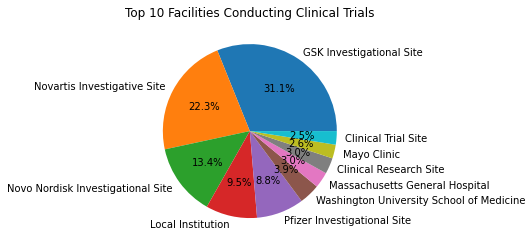

In [63]:
plt.pie(merged2['facility'].value_counts().head(10), labels = merged2["facility"].value_counts().head(10).index, autopct='%1.1f%%')
plt.title("Top 10 Facilities Conducting Clinical Trials")
plt.show()

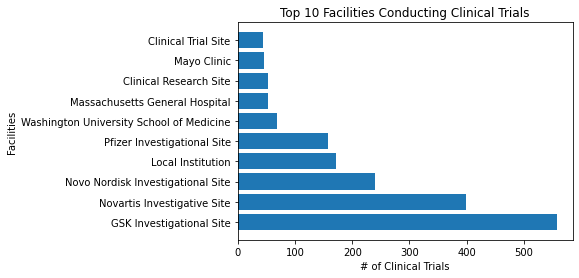

In [64]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

x = merged2["facility"].value_counts().head(10).index
labels = merged2['facility'].value_counts().head(10)

x_pos = [i for i,value in enumerate(x)]

plt.barh(x_pos, labels)
plt.ylabel("Facilities")
plt.xlabel("# of Clinical Trials")
plt.title("Top 10 Facilities Conducting Clinical Trials")
plt.yticks(x_pos, x)
plt.show()


In [65]:
merged2['pri_spec'].value_counts()

HEMATOLOGY/ONCOLOGY                        5781
MEDICAL ONCOLOGY                           2978
INTERNAL MEDICINE                          1824
RADIATION ONCOLOGY                         1588
NEUROLOGY                                  1156
                                           ... 
ANESTHESIOLOGY ASSISTANT                      4
MICROGRAPHIC DERMATOLOGIC SURGERY (MDS)       2
PERIPHERAL VASCULAR DISEASE                   1
MEDICAL TOXICOLOGY                            1
DENTIST                                       1
Name: pri_spec, Length: 83, dtype: int64

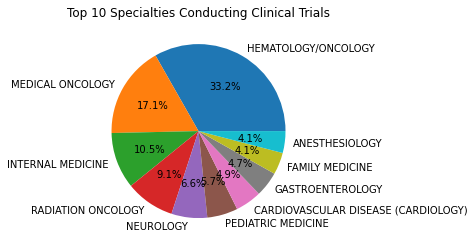

In [66]:
plt.pie(merged2['pri_spec'].value_counts().head(10), labels = merged2['pri_spec'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title("Top 10 Specialties Conducting Clinical Trials")
plt.show()

The top 10 specialties conducting clinical trials is shown below. These specialties account for about 56% of all specialties clinical trials are conducted under. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=baeb6de4-e5bb-44f9-9c40-76d841ef931e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>